#Implementation of topological data analysis as a means for explainable machine learning in neural networks




The dataset chosen for the project is breast cancer binary classification provided by the UCI repository. The project is focused towards showing topological data analysis techniques such as persistent homology, Mapper algorithm and Umap on an artificial neural network.

In addition, the project showcases traditional explainable machine learning techniques of Partial Dependenc Plots, Individual Conditional Expectations and SHAP values implemented over a random forest algorithm.


##Installing and Importing the necessary libraries. 

In [1]:
#The giotto-tda library provides the necessary tools for implementing TDA
pip install giotto-tda

     |████████████████████████████████| 1.5 MB 7.4 MB/s 
ERROR: Operation cancelled by user


In [2]:
#installing the umap library
pip install umap-learn

     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=43ee57a4a1bb9dd404f2d78b9c87393f53bc18556f04ddaed7e75407729abcfd
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=e84b2bbad8790c491c82d7a9320eaa9c65b9c49df7b75492ec71b85a4a2c297b
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [4]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import gtda.diagrams as diag
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.homology import VietorisRipsPersistence
import gtda.graphs as gr
from gtda.pipeline import Pipeline
from gtda.plotting import plot_point_cloud, plot_heatmap
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance
from gtda.mapper import(
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph)
from gtda.mapper import Eccentricity, Entropy

import umap.umap_ as umap

from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Importing the dataset from the system
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [6]:
#Installing the dataset as a dataframe

import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

## Data Preprocessing and Exploratory Data Analysis

In [7]:
#Going through the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#looking at the number of rows and columns
df.shape


(569, 33)

In [9]:
#taking the list of columns
df.columns.to_list()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

Diagnosis is the target variable. It is in a categorical shape and hence shall be converted to numerical using LabelEncoder.

In [10]:
#converting the target variable to numerical from categorical

le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [11]:
#checking if the target variable has been converted or not.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
#checking for total values by variable

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
#checking for null values

df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [14]:
#dropping the excess column

df = df.drop(['Unnamed: 32'], axis=1)

In [16]:
#Conducting descriptive statistics.
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Correlation between all the features')

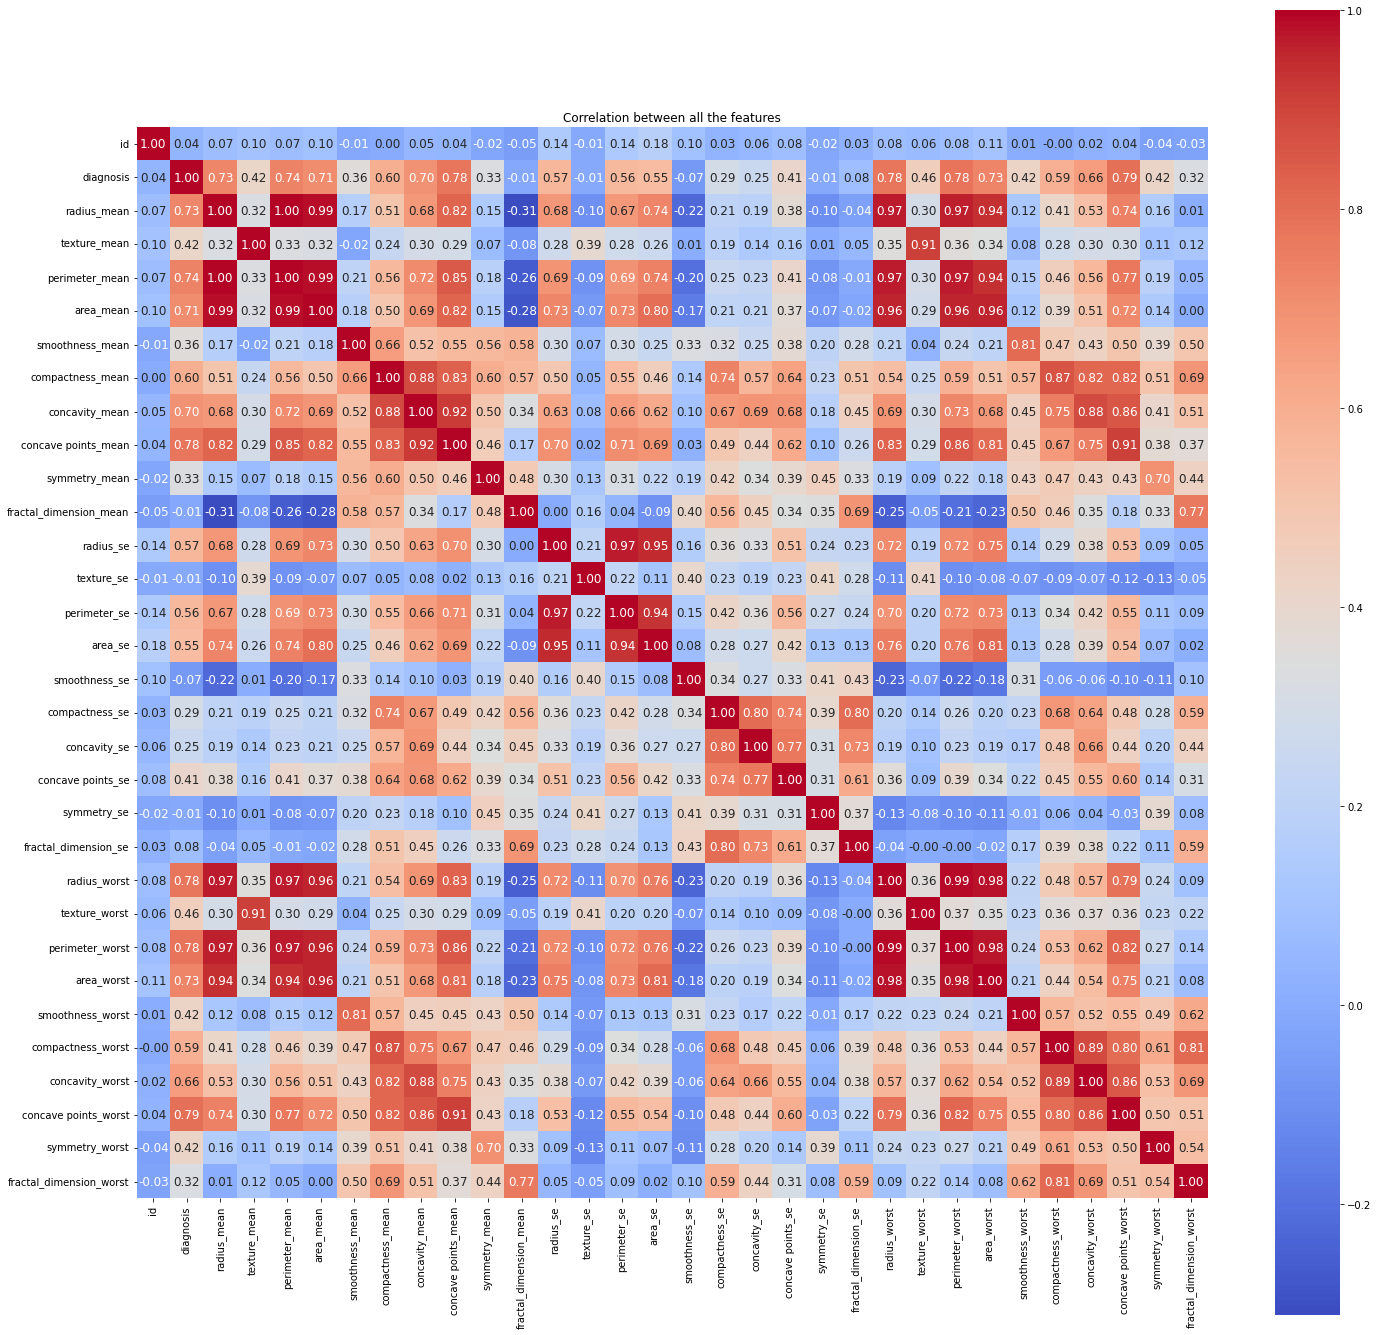

In [18]:
""" Plotting the correlation heatmap as means for inferential statistics"""

df_corr = df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

In [19]:
#copying the data into a different dataframe. Preparing data for the model.

X = df.copy()

In [20]:
#dropping the excessive column and the target variable
X = X.drop(['id','diagnosis'], axis = 1)

In [ ]:
#getting the target variable into a different data frame
y = df['diagnosis']

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Standard scaler and train test split

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))


In [24]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35,random_state = 324)

In [26]:
print ("X_train: ", X_train.shape)
print("==========================")
print("y_train: ", y_train.shape)
print("==========================")
print("X_test: ", X_test.shape)
print("==========================")
print("y_test: ", y_test.shape)

X_train:  (369, 30)
y_train:  (369,)
X_test:  (200, 30)
y_test:  (200,)


## Random Forest

In [ ]:
#Creating the random forest classifier

RF = RandomForestClassifier(max_depth=10, random_state=0)
RF_clf = RF.fit(X_train,y_train)
RF_clf

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
#conducting predictions on test set
RF_pred = RF_clf.predict(X_test)

In [ ]:
#printing the classification report

print('Accuracy: \n', accuracy_score(y_test,RF_pred))
print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))

Accuracy: 
 0.955
[[122   2]
 [  7  69]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.97      0.91      0.94        76

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



## Plotting the PDP, ICE and SHAP plots

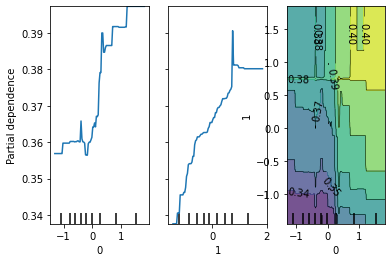

In [ ]:
#random forest pdp for the first two features
features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(RF_clf, X, features)

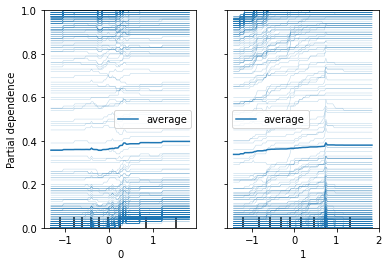

In [ ]:
#plotting the ICE plot for the first two features
features = [0,1
            ]
PartialDependenceDisplay.from_estimator(RF_clf, X, features,kind='both',)

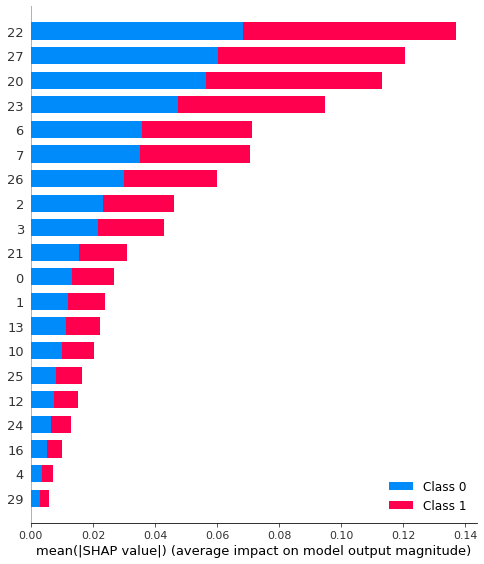

In [ ]:
#Plotting the shap values

import shap
shap_values = shap.TreeExplainer(RF_clf).shap_values(X)
shap.summary_plot(shap_values, X_train, plot_type="bar",title = "SHAP values for random forest model")

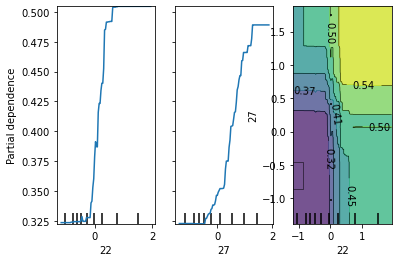

In [ ]:
#random forest pdp for texture_worst and compactness_worst
features = [22,27, (22,27)]
PartialDependenceDisplay.from_estimator(RF_clf, X, features)

## Implementation of the neural network

In [30]:
#Creating the neural network. Input shape shall be equivalent to the number of input features

from tensorflow.python.keras import optimizers as opt
model = Sequential()
model.add(Dense(60, input_shape = (30,), activation = "relu"))
model.add(Dense(40, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))
model.compile(Adam(lr = 0.01), "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1860      
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                                 
Total params: 4,382
Trainable params: 4,382
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
# fit your model to the training data.
history = model.fit(X_train, 
          y_train,
          epochs=15,
          batch_size=10,
          shuffle=True,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/15
37/37 - 1s - loss: 0.1427 - accuracy: 0.9566 - val_loss: 0.1253 - val_accuracy: 0.9600 - 939ms/epoch - 25ms/step
Epoch 2/15
37/37 - 0s - loss: 0.0518 - accuracy: 0.9864 - val_loss: 0.1482 - val_accuracy: 0.9650 - 132ms/epoch - 4ms/step
Epoch 3/15
37/37 - 0s - loss: 0.1046 - accuracy: 0.9810 - val_loss: 0.2339 - val_accuracy: 0.9650 - 137ms/epoch - 4ms/step
Epoch 4/15
37/37 - 0s - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.1523 - val_accuracy: 0.9550 - 142ms/epoch - 4ms/step
Epoch 5/15
37/37 - 0s - loss: 0.0220 - accuracy: 0.9946 - val_loss: 0.2032 - val_accuracy: 0.9600 - 110ms/epoch - 3ms/step
Epoch 6/15
37/37 - 0s - loss: 0.0126 - accuracy: 0.9946 - val_loss: 0.2220 - val_accuracy: 0.9600 - 135ms/epoch - 4ms/step
Epoch 7/15
37/37 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2424 - val_accuracy: 0.9650 - 143ms/epoch - 4ms/step
Epoch 8/15
37/37 - 0s - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.2678 - val_accuracy: 0.9600 - 106ms/epoch - 3ms/step
Epoch 9/15
37/3

In [32]:
#Plotting accuracy and loss for training and validation

import plotly.express as px
dH = pd.DataFrame(history.history)
fig = go.Figure()

fig.add_trace(go.Scatter(x=dH.index, y=dH['loss'],
                    mode='lines',
                    name='Training loss',
                    line_color='red'))
fig.add_trace(go.Scatter(x=dH.index, y=dH['val_loss'],
                    mode='lines',
                    name='Validation loss',
                    line_color='orange'))
fig.add_trace(go.Scatter(x=dH.index, y=dH['accuracy'],
                    mode='lines',
                    name='Training accuracy',
                    line_color='green'))
fig.add_trace(go.Scatter(x=dH.index, y=dH['val_accuracy'],
                    mode='lines',
                    name='Validation accuracy',
                    line_color='olive'))
fig.update_layout(
    title="Accuracy and Loss",
    xaxis_title="Number of epochs")
fig.update_layout({'plot_bgcolor': 'aliceblue' , #or azure
'paper_bgcolor': 'white',}, template='plotly_white')

In [33]:
# Define the Keras TensorBoard callback.
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#model fit
model_loss, model_accuracy = model.evaluate(
    X_test, 
    y_test, 
    verbose=2,
    callbacks=[tensorboard_callback])
print(f"Validation Loss= {model_loss: .2f}, ; Validation Accuracy: {model_accuracy*100:.2f}%, for binary classification")

7/7 - 0s - loss: 0.3289 - accuracy: 0.9650 - 131ms/epoch - 19ms/step
Validation Loss=  0.33, ; Validation Accuracy: 96.50%, for binary classification


In [34]:
#predicting on the test set

y_pred = model.predict(X_test)

In [36]:
#extracting the predicted values of y_pred into y_pred_nn

y_pred_nn=model.predict(X_test)
y_pred_nn =(y_pred_nn > 0.5)

## Topological Data Analysis implementation

### Extracting the output of each layer of neural network

In [39]:
#getting the layers of model into a variable

layers = model.layers
model.get_layer('dense').output[0:]

<KerasTensor: shape=(None, 60) dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

In [46]:
""" Extracting outputs of each layer of neural network and storing them in 
a variable"""

from keras.models import Model


nn_layer_name_0 = 'dense'
nn_layer_name_1 = 'dense_1'
nn_layer_name_3 = 'dense_2'

nn_layer_model_0 = Model(inputs=model.input,
                                 outputs=model.get_layer(nn_layer_name_0).output)
nn_layer_model_1 = Model(inputs=model.input,
                                 outputs=model.get_layer(nn_layer_name_1).output)
# intermediate_layer_model_2 = Model(inputs=model.input,
#                                  outputs=model.get_layer(layer_name_2).output)
nn_layer_model_3 = Model(inputs=model.input,
                                 outputs=model.get_layer(nn_layer_name_3).output)

intermediate_output_0 = nn_layer_model_0.predict(X)
intermediate_output_1 = nn_layer_model_1.predict(X)
# intermediate_output_2 = intermediate_layer_model_2.predict(X)
intermediate_output_3 = nn_layer_model_3.predict(X)

### Persistent Homology Implementation

In [47]:
"""Initializing vietori risps persistence for creation of persistent homology
graphs"""

from gtda.homology import VietorisRipsPersistence


homology_dimensions = [0, 1, 2]
homology_dimensions = [0, 1, 2]
VR = VietorisRipsPersistence(
                        homology_dimensions=homology_dimensions,
                        coeff=3,
                        n_jobs=-1)

diagram_raw =VR.fit_transform(np.array(X)[None, : , :])
diagram_0 =VR.fit_transform(np.array(intermediate_output_0)[None, : , :])

In [ ]:
#Persistent Homology graph for the original dataset
VR.fit_transform_plot(np.array(X).reshape(1, *np.array(X).shape))


array([[[0.        , 1.00611496, 0.        ],
        [0.        , 1.027614  , 0.        ],
        [0.        , 1.09709632, 0.        ],
        ...,
        [1.96408069, 2.12252545, 2.        ],
        [1.95632124, 1.97279835, 2.        ],
        [1.69369256, 1.70463431, 2.        ]]])

In [ ]:
#plot persistence diagram for input layer of neural network
VR.fit_transform_plot(np.array(intermediate_output_0).reshape(1, *np.array(intermediate_output_0).shape))

array([[[0.        , 0.92490625, 0.        ],
        [0.        , 1.12856197, 0.        ],
        [0.        , 1.13154984, 0.        ],
        ...,
        [2.11210227, 2.1780405 , 2.        ],
        [2.10415697, 2.17294812, 2.        ],
        [2.07149339, 2.10434079, 2.        ]]])

In [ ]:
#plot persistence diagram for hidden layer of neural network
VR.fit_transform_plot(np.array(intermediate_output_1).reshape(1, *np.array(intermediate_output_1).shape))

array([[[0.        , 0.64050353, 0.        ],
        [0.        , 0.64755374, 0.        ],
        [0.        , 0.68566304, 0.        ],
        ...,
        [2.62918615, 2.71001554, 2.        ],
        [2.54822326, 2.59302235, 2.        ],
        [2.29906416, 2.48468399, 2.        ]]])

In [ ]:
#plot persistence diagram for the output layer of the neural network
VR.fit_transform_plot(np.array(intermediate_output_3).reshape(1, *np.array(intermediate_output_3).shape))

array([[[0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 1.49011612e-08, 0.00000000e+00],
        [0.00000000e+00, 2.10734239e-08, 0.00000000e+00],
        [0.00000000e+00, 2.10734239e-08, 0.00000000e+00],
        [0.00000000e+00, 2.58095678e-08, 0.00000000e+00],
        [0.000

### Implementation of Mapper algorithm

In [ ]:
#creating the mapper pipeline
""" Define filter function"""
filter_func = Eccentricity(metric= 'euclidean')
""" 2. Define cover """
cover = CubicalCover(n_intervals=20,
                     overlap_frac=0.5)
""" 3. Choose clustering algorithm – default is DBSCAN """
clusterer = DBSCAN(eps=8, 
                   min_samples=2, 
                   metric='euclidean')

""" 4. Initialise pipeline """
pipe_mapper = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=-1)

In [ ]:
#Plotting the mapper graph for original dataset
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               X, 
                               layout='fruchterman_reingold',
                               #color_by_columns_dropdown=True,
                               #color_variable = df['diagnosis'],
                               node_scale =20,
                               
                               plotly_params=plotly_params)
fig.update_layout( title="Mapper Graph: Original Dataset")
fig.show(config={'scrollZoom': True})

In [ ]:
#plotting the mapper graph for input layer of neural network
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_0, 
                               layout='fruchterman_reingold',
                              #  color_by_columns_dropdown=True,
                              # color_variable = y,
                               node_scale =20,
                               plotly_params=plotly_params)
fig.update_layout( title="Mapper Graph: Input Layer of Neural Network")
fig.show(config={'scrollZoom': True})

In [ ]:
#plotting the mapper graph for the hidden layer of neural network

plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_1, 
                               layout='fruchterman_reingold',
                               #color_by_columns_dropdown=True,
                              #  color_variable =clean['pIC50'],
                               node_scale =20,
                               plotly_params=plotly_params)
fig.update_layout( title="Mapper Graph: Hidden Layer of Neural Network")
fig.show(config={'scrollZoom': True})

In [ ]:
#plotting the mapper graph for the output layer of the neural network
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_3, 
                               layout='fruchterman_reingold',
                               #color_by_columns_dropdown=True,
                              #  color_variable =clean['pIC50'],
                               node_scale =20,
                               plotly_params=plotly_params)
fig.update_layout( title="Mapper Graph: Output Layer of Neural Network")
fig.show(config={'scrollZoom': True})

### Implementation of Uniform Manifold Approximation and Projection- UMAP"

In [ ]:
""" Uniform Manifold Approximation and Projection -UMAP"""
#UMAP class
n_neighbors=10
min_dist=0.5 
umap_2d = umap.UMAP(n_neighbors=n_neighbors,
                    #metric=metric,
                    n_components=2, #n_components = dimensions
                    min_dist=min_dist,
                    init='random', 
                    random_state=0) 

dfData = pd.DataFrame(umap_2d.fit_transform(X))
dfnnL1 = pd.DataFrame(umap_2d.fit_transform(intermediate_output_0))
dfnnL2 = pd.DataFrame(umap_2d.fit_transform(intermediate_output_1))
# dfnnL3 = pd.DataFrame(umap_2d.fit_transform(intermediate_output_2))
dfnnL4 = pd.DataFrame(umap_2d.fit_transform(intermediate_output_3))

fig = make_subplots( rows=3, cols=2, 
                    subplot_titles=("UMAP: Original Data", 
                                    "UMAP: Input Layer", 
                                    "UMAP: Hidden Layer", 
                                    "UMAP: Output Layer"
                                    )
)


fig.add_trace(go.Scatter(x=dfData[0], y=dfData[1], 
                         mode="markers", 
                         marker_color=pd.DataFrame(y)['diagnosis'],
                         marker_size = 4), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=dfnnL1[0], y=dfnnL1[1], 
                         mode="markers", 
                         marker_color=pd.DataFrame(y)['diagnosis'],
                         marker_size = 4),
              row=1, col=2)

fig.add_trace(go.Scatter(x=dfnnL2[0], y=dfnnL2[1],
                         mode="markers", 
                         marker_color=pd.DataFrame(y)['diagnosis'],
                         marker_size = 4),
              row=2, col=1)

fig.add_trace(go.Scatter(x=dfnnL4[0], y=dfnnL4[1],
                         mode="markers", 
                         marker_color=pd.DataFrame(y)['diagnosis'],
                         marker_size = 4),
              row=2, col=2)

fig.update_layout(height=900, 
                  width=800, 
                  showlegend=False,
                  title_text="UMAP Layers data projections")
fig.update_layout({'plot_bgcolor': 'aliceblue' , #or azure
'paper_bgcolor': 'white',}, template='plotly_white')

fig.show()